In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import statsmodels.formula.api as smf

In [2]:
car_df=pd.read_csv('/content/car-mlg-pred.csv')
car_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
car_df.shape

(398, 9)

In [4]:
car_df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
car_df.horsepower.unique()


array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [7]:
#In the horsepower values ? mark is included hence we get to know that the variable is object and needs to be replaced by convert horsepower variable to integer

In [8]:
car_df['horsepower']=car_df['horsepower'].replace('?',np.nan)

In [9]:
car_df['horsepower'].isnull().sum()

6

In [10]:
car_df['horsepower']=car_df['horsepower'].astype('float64')


In [11]:
car_df['horsepower'].dtype

dtype('float64')

In [12]:
#fill nan values to median values now

In [13]:
car_df['horsepower']=car_df['horsepower'].fillna(car_df['horsepower'].median())

In [28]:
car_df['horsepower'].isnull().sum()

0

In [30]:
# Select only numeric columns
numeric_cols = car_df.select_dtypes(include='number')

# Compute correlation matrix
corr_table = numeric_cols.corr()

# Display correlation table
print(corr_table)

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.773453 -0.831741   
cylinders    -0.775396   1.000000      0.950721    0.841284  0.896017   
displacement -0.804203   0.950721      1.000000    0.895778  0.932824   
horsepower   -0.773453   0.841284      0.895778    1.000000  0.862442   
weight       -0.831741   0.896017      0.932824    0.862442  1.000000   
acceleration  0.420289  -0.505419     -0.543684   -0.686590 -0.417457   
model year    0.579267  -0.348746     -0.370164   -0.413733 -0.306564   
origin        0.563450  -0.562543     -0.609409   -0.452096 -0.581024   

              acceleration  model year    origin  
mpg               0.420289    0.579267  0.563450  
cylinders        -0.505419   -0.348746 -0.562543  
displacement     -0.543684   -0.370164 -0.609409  
horsepower       -0.686590   -0.413733 -0.452096  
weight           -0.417457   -0.306564 -0.581024  
acceleration      1.000000    0.2881

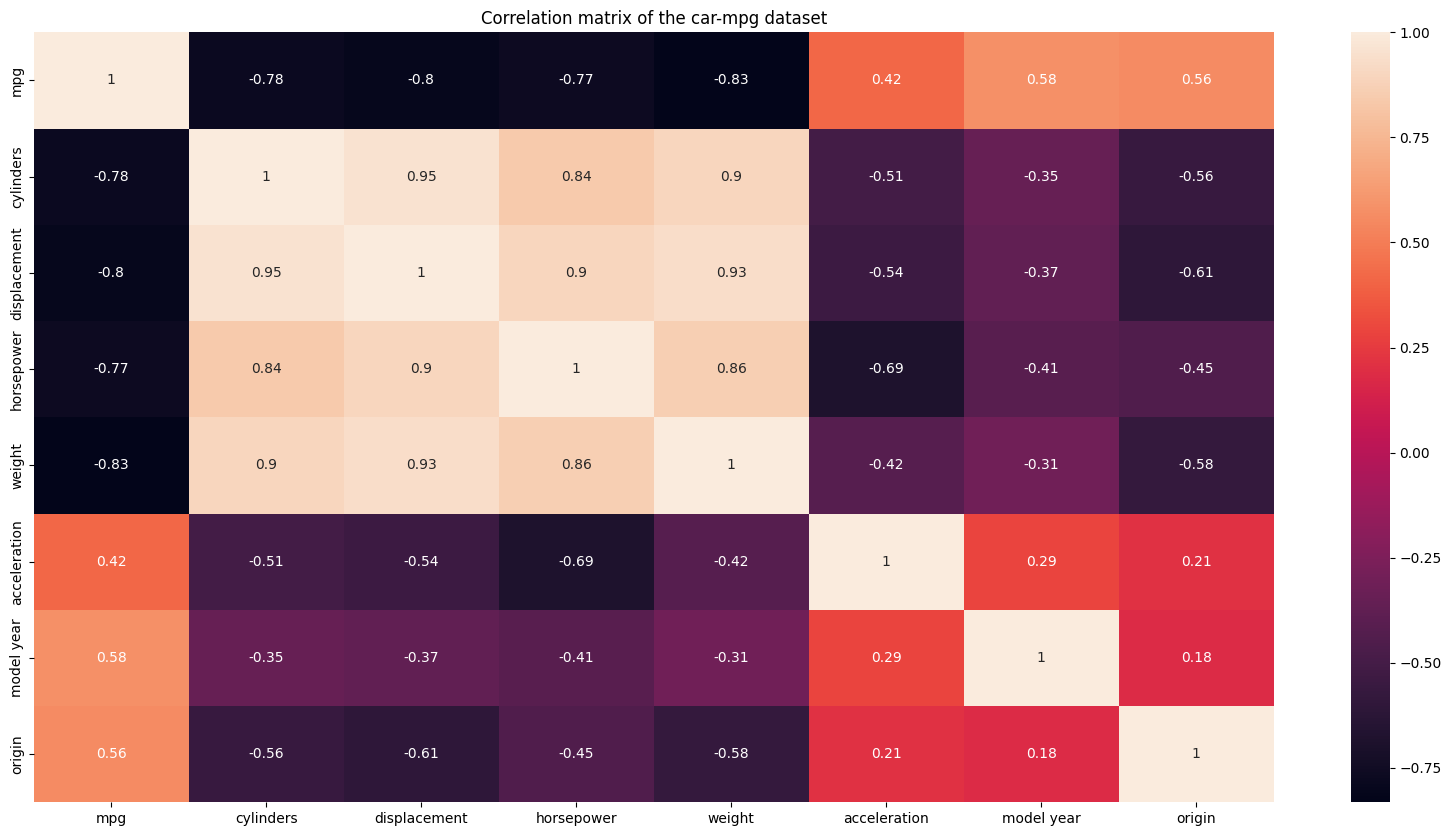

In [31]:
#visualization
plt.figure(figsize=(20,10))
g=sns.heatmap(corr_table,annot=True)
g.set(title='Correlation matrix of the car-mpg dataset')
plt.show()

In [32]:
#Inferences:
#Mpg column is having good corelation on cyl,disp,wt
#cyl ,disp and wt and hp are having negative corelation
#next will check the data distribution using the pair plot

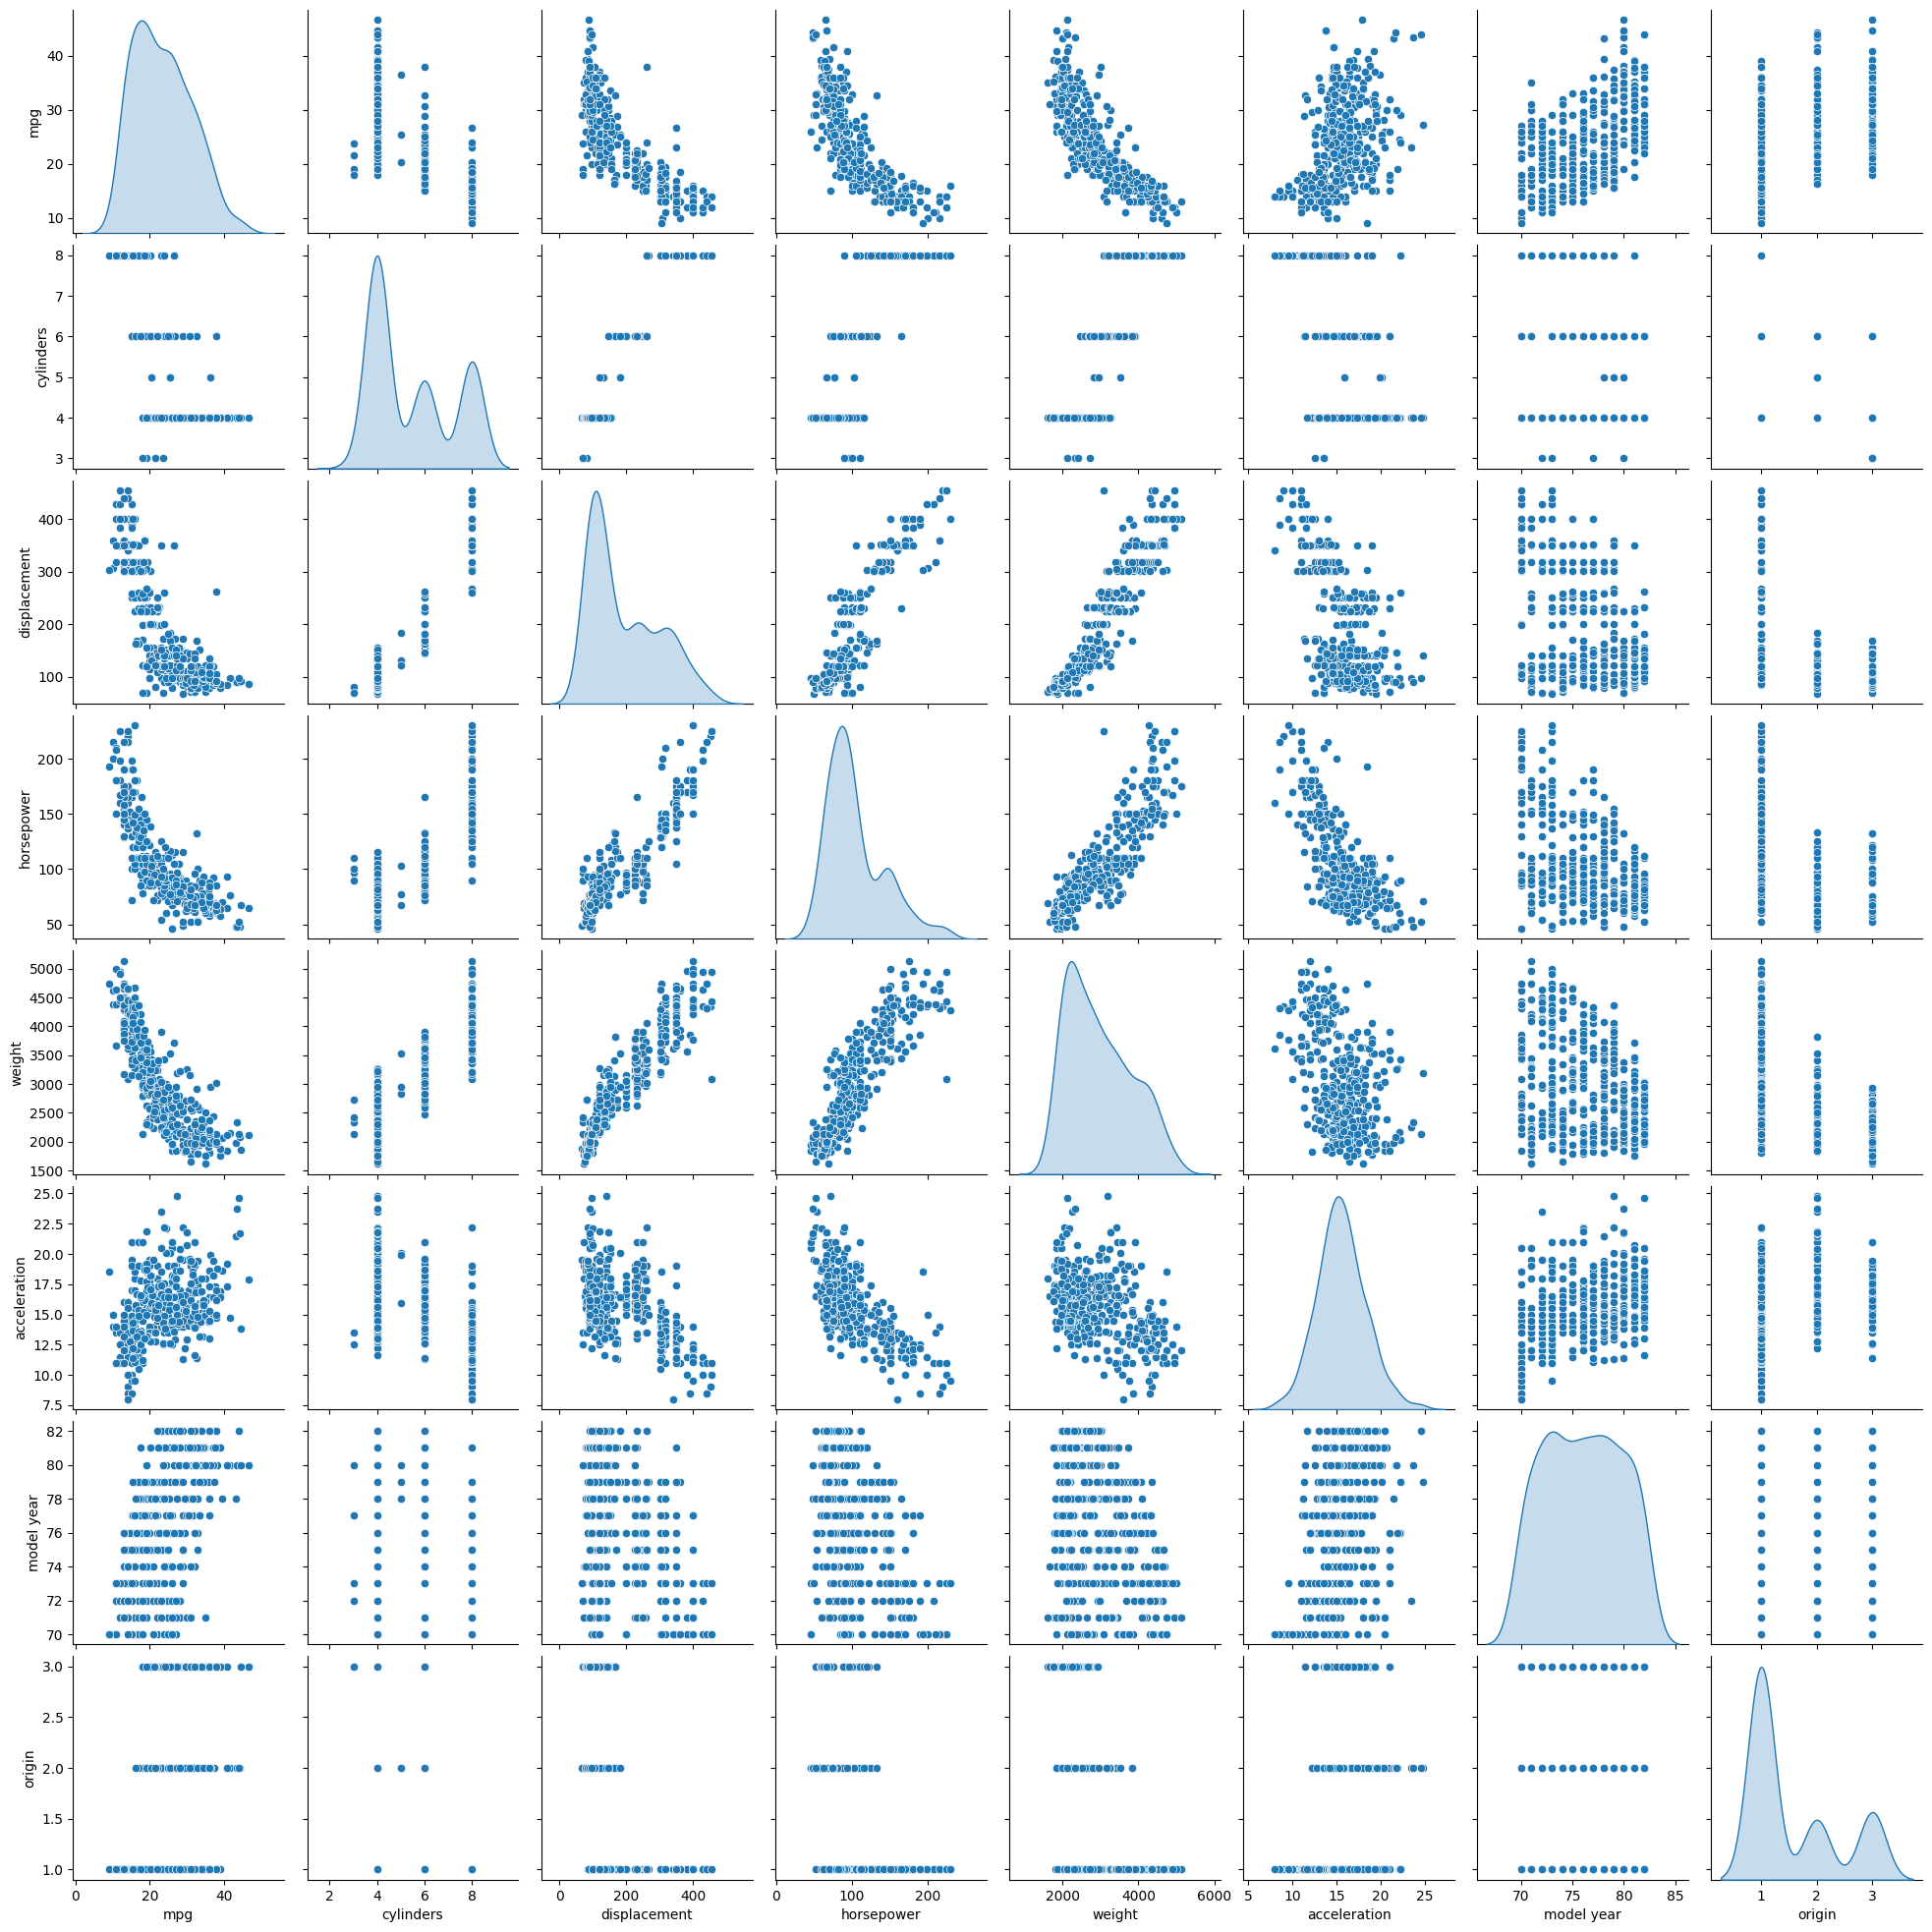

In [33]:
sns.pairplot(car_df,diag_kind='kde')
plt.show()

In [34]:
car_df['cylinders'].value_counts()

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64

In [35]:
import statsmodels.formula.api as smf

In [36]:
test1=smf.ols('mpg~cylinders+displacement+horsepower+weight+acceleration+origin',car_df).fit()

In [37]:
test1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     166.0
Date:                Sun, 14 Jul 2024   Prob (F-statistic):          3.03e-104
Time:                        17:24:21   Log-Likelihood:                -1130.6
No. Observations:                 398   AIC:                             2275.
Df Residuals:                     391   BIC:                             2303.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       42.9725      2.699     15.920      0.000      37.666      48.279
cylinders       -0.5325      0.403     -1.320      0.188      -1.326       0.261
displacement     0.0113      0.009      1.201      0.230      -0.007       0.030
horsepower      -0.0563      0.016     -3.421      0.001      -0.089      -0.024
weight          -0.0050      0.001     -6.337      0.000      -0.007      -0.003
acceleration    -0.0118      0.121     -0.097      0.922      -0.250       0.227
origin           1.4539      0.346      4.206      0.000       0.774       2.133
==============================================================================
Omnibus:                       32.446   Durbin-Watson:                   0.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.885
Skew:                           0.623   Prob(JB):                     4.87e-10
Kurtosis:                       4.018   Cond. No.                     4.00e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
#Inference as in the above summary the p value of the acc is greater than 0.05 so we can remove the acc variable from the dataset

In [39]:
car_df=car_df.drop('acceleration',axis=1)
car_df.head()

,mpg,cylinders,displacement,horsepower,weight,model year,origin,car name
0,18.0,8,307.0,130.0,3504,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,70,1,ford torino


In [40]:
car_df=car_df.drop('car name',axis=1)
car_df.head()

,mpg,cylinders,displacement,horsepower,weight,model year,origin
0,18.0,8,307.0,130.0,3504,70,1
1,15.0,8,350.0,165.0,3693,70,1
2,18.0,8,318.0,150.0,3436,70,1
3,16.0,8,304.0,150.0,3433,70,1
4,17.0,8,302.0,140.0,3449,70,1


In [41]:
#training regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn import metrics

In [42]:
y=car_df['mpg']
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [43]:
x=car_df.iloc[:,1:]
x.head()

,cylinders,displacement,horsepower,weight,model year,origin
0,8,307.0,130.0,3504,70,1
1,8,350.0,165.0,3693,70,1
2,8,318.0,150.0,3436,70,1
3,8,304.0,150.0,3433,70,1
4,8,302.0,140.0,3449,70,1


In [44]:
#KFold method to train and test model

In [45]:
kf=KFold(n_splits=5,shuffle=True,random_state=2)
rmse=[]
for train,test in kf.split(x,y):
    LR=LinearRegression()
    #print(train)
    xtrain=x.iloc[train]
    xtest=x.iloc[test]
    ytrain=y.iloc[train]
    ytest=y.iloc[test]
    LR.fit(xtrain,ytrain)
    ypredict=LR.predict(xtest)

    rmse.append(np.sqrt(metrics.mean_squared_error(ytest,ypredict)))
    print('Rmse error in the first test is :%1.3f'%(rmse[0]))
print('Rmse error in the second test is:%1.3f'%(rmse[1]))
print('Rmse error in the third test is :%1.3f'%(rmse[2]))
print('Rmse error in the fourth test is:%1.3f'%(rmse[3]))
print('Rmse error in the fifth test is :%1.3f'%(rmse[4]))

print('Average mean rmse error i.e Bias error is: %1.3f'%(np.mean(rmse)))

print('Variance of rmse error i.e Variance error is: %1.3f'%(np.var(rmse,ddof=1)))

Rmse error in the first test is :2.771
Rmse error in the first test is :2.771
Rmse error in the first test is :2.771
Rmse error in the first test is :2.771
Rmse error in the first test is :2.771
Rmse error in the second test is:3.577
Rmse error in the third test is :3.657
Rmse error in the fourth test is:3.461
Rmse error in the fifth test is :3.343
Average mean rmse error i.e Bias error is: 3.362
Variance of rmse error i.e Variance error is: 0.123


In [49]:
new_mileage = LR.predict(values)

# Ensure new_mileage is a scalar value (assuming you want the first prediction)
predicted_mileage = new_mileage[0]

# Print the predicted mileage
print('Predicted new mileage for the above values is %1.3f' % predicted_mileage)

Predicted new mileage for the above values is 23.630
